In [43]:
# # Attaching the drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
os.getcwd()

'/Users/pranav/AIML/NLP/MyProjects/Emotions_Detection_From_Tweet'

In [45]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [46]:
# !pip install kaggle

In [47]:
# !kaggle datasets download -d pashupatigupta/emotion-detection-from-text

In [48]:
os.chdir('/content/drive/MyDrive/gdrive/Human_detection_from_Text')

In [49]:
# zip_path = '/content/drive/MyDrive/gdrive/emotion-detection-from-text.zip'

In [50]:
# !cp {'zip_path'}

In [51]:
# !unzip -q 'emotion-detection-from-text.zip'

In [2]:
dir = os.listdir()

In [3]:
dir

['Emotion_Detection_From_Tweet.ipynb',
 'emotion_from_tweet.h5',
 '.ipynb_checkpoints',
 'tweet_emotions.csv']

In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [5]:
df = pd.read_csv(dir[3])

In [6]:
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [7]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [8]:
df[df['sentiment'] == 'empty']

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
44,1956978276,empty,@creyes middle school and elem. High schools w...
52,1956979917,empty,@djmicdamn hey yu lil fucker i textd yu
141,1957000336,empty,@softtouchme just answered you- never learned ...
180,1957007357,empty,Have a headache I'm going to bed. Goodnight!
...,...,...,...
39702,1753868848,empty,"Here we go again, back to work. Happy Mothers ..."
39742,1753870123,empty,@PhilippaJane the &quot;no pants&quot; idea co...
39749,1753870555,empty,@sloanyxxx Thanks
39845,1753886183,empty,@xxxRobyn Yeah *fingers crossed*


In [9]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from sklearn.model_selection import train_test_split

In [10]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [11]:
# df['content'] = df['content'].str.lower()

In [12]:
# df['content'] = df['content'].apply(nltk.word_tokenize)

In [13]:
# stop_words = set(stopwords.words('english'))

In [14]:
# df['content'] = df['content'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [15]:
# stemmer = PorterStemmer()
# df['content'] = df['content'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [16]:
X = df['content']

In [17]:
y = df['sentiment'].values

In [18]:
class_num = len(set(y))

In [19]:
class_num

13

In [20]:
X

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [21]:
y

array(['empty', 'sadness', 'sadness', ..., 'love', 'happiness', 'love'],
      dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)


In [23]:
encoded_labels

array([ 2, 10, 10, ...,  7,  5,  7])

In [24]:
from keras.utils import to_categorical

y_encoded = to_categorical(encoded_labels, num_classes=13)


In [25]:
y_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
MAX_FEATURES = 200000

In [27]:
from tensorflow.keras.layers import TextVectorization

In [28]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

2023-09-02 10:23:02.295731: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-09-02 10:23:02.295769: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-09-02 10:23:02.295805: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-09-02 10:23:02.296340: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-02 10:23:02.296697: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
vectorizer.adapt(X.values)

2023-09-02 10:23:03.292965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [30]:
vectorized_text = vectorizer(X.values)

In [53]:
vectorized_text

<tf.Tensor: shape=(40000, 1800), dtype=int64, numpy=
array([[19127,     2,    55, ...,     0,     0,     0],
       [12138,   310,   146, ...,     0,     0,     0],
       [ 2882, 47740,   229, ...,     0,     0,     0],
       ...,
       [   50,    69,    22, ...,     0,     0,     0],
       [ 8090,  2775,   380, ...,     0,     0,     0],
       [11677, 14147,  1030, ...,     0,     0,     0]])>

Traceback (most recent call last):
  File "/Users/pranav/miniconda3/envs/myenv/lib/python3.10/site-packages/gradio/routes.py", line 523, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/pranav/miniconda3/envs/myenv/lib/python3.10/site-packages/gradio/blocks.py", line 1437, in process_api
    result = await self.call_function(
  File "/Users/pranav/miniconda3/envs/myenv/lib/python3.10/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/pranav/miniconda3/envs/myenv/lib/python3.10/site-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/Users/pranav/miniconda3/envs/myenv/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/Users/pranav/miniconda3/envs/myenv/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = 

In [31]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y_encoded))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [32]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [34]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(class_num, activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 13)                1677      
                                                        

In [86]:
history = model.fit(train, epochs=30, validation_data=val)

Epoch 1/10
1750/1750 [==============================] - 205s 113ms/step - loss: 2.0417 - accuracy: 0.2885 - val_loss: 1.8472 - val_accuracy: 0.3785
Epoch 2/10
1750/1750 [==============================] - 174s 100ms/step - loss: 1.8119 - accuracy: 0.3822 - val_loss: 1.5829 - val_accuracy: 0.4589
Epoch 3/10
1750/1750 [==============================] - 170s 97ms/step - loss: 1.5358 - accuracy: 0.4782 - val_loss: 1.2502 - val_accuracy: 0.6043
Epoch 4/10
1750/1750 [==============================] - 177s 101ms/step - loss: 1.2518 - accuracy: 0.5916 - val_loss: 1.0330 - val_accuracy: 0.6686
Epoch 5/10
1750/1750 [==============================] - 172s 98ms/step - loss: 1.0140 - accuracy: 0.6751 - val_loss: 0.7876 - val_accuracy: 0.7525
Epoch 6/10
1750/1750 [==============================] - 175s 100ms/step - loss: 0.8395 - accuracy: 0.7309 - val_loss: 0.6708 - val_accuracy: 0.7876
Epoch 7/10
1750/1750 [==============================] - 173s 99ms/step - loss: 0.7059 - accuracy: 0.7747 - val_los

<Figure size 800x500 with 0 Axes>

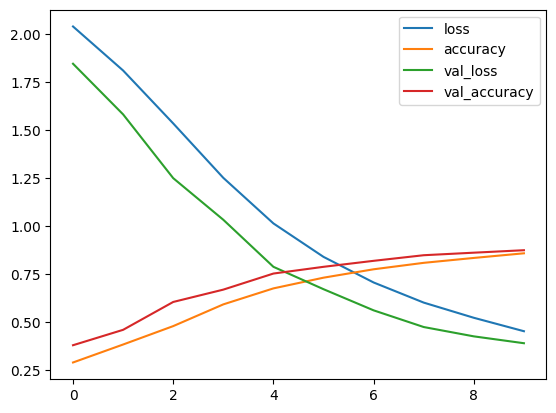

In [87]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [88]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [89]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [90]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 53ms/step


In [91]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.9546766877174377, Recall:0.8267499804496765, Accuracy:0.06800000369548798


In [95]:
model.save('emotion_from_tweet.h5')

In [37]:
model = tf.keras.models.load_model('emotion_from_tweet.h5')

In [38]:
input_str = vectorizer('love this')

In [39]:
input_str

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([44, 31,  0, ...,  0,  0,  0])>

In [40]:
res = model.predict(np.expand_dims(input_str,0))

2023-09-02 10:24:02.144707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-02 10:24:02.368666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-02 10:24:02.380239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


In [41]:
res

array([[1.7295148e-28, 0.0000000e+00, 0.0000000e+00, 2.4418033e-25,
        6.7822517e-17, 1.6752924e-14, 0.0000000e+00, 9.9999988e-01,
        4.1214179e-25, 3.2065000e-15, 2.3659032e-23, 8.9619590e-08,
        2.5680192e-21]], dtype=float32)

In [42]:
predicted_class_index = np.argmax(res)

In [43]:
predicted_class_index

7

In [44]:
y[predicted_class_index]

'worry'

In [45]:
!pip install gradio jinja2

  Obtaining dependency information for gradio from https://files.pythonhosted.org/packages/83/07/5040f8b58b91e8a1053f0148a7b515329a2dfc17d74e62cc0871a2b9908e/gradio-3.42.0-py3-none-any.whl.metadata
  Obtaining dependency information for aiofiles<24.0,>=22.0 from https://files.pythonhosted.org/packages/c5/19/5af6804c4cc0fed83f47bff6e413a98a36618e7d40185cd36e69737f3b0e/aiofiles-23.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/89/e1/5391318b8b35eb4873ea504ca5181a5569d8e499a0920a61ba7e29e8fc2a/fastapi-0.103.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for gradio-client==0.5.0 from https://files.pythonhosted.org/packages/fe/85/ec0323f39192c4bee04e8e06e64213aff816b9d1b61c3c8367e75b1c7e10/gradio_client-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for httpx from https://files.pythonhosted.org/packages/ec/91/e41f64f03d2a13aee7e8c819d82ee3aa

In [46]:
import tensorflow as tf
import gradio as gr

In [54]:
def score_comment(comment):
    vectorized_comment = vectorizer(comment)
    results = model.predict(np.expand_dims(vectorized_comment, 0))

    text = '{}'.format(y[np.argmax(results)])
    print(text)
    return text

In [55]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Tweet to find emotions'),
                        outputs='text')

/var/folders/fq/1jc79fnd4t34l288dy5jscf80000gn/T/ipykernel_7900/3276486016.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=2, placeholder='Tweet to find emotions'),
/var/folders/fq/1jc79fnd4t34l288dy5jscf80000gn/T/ipykernel_7900/3276486016.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Tweet to find emotions'),
/var/folders/fq/1jc79fnd4t34l288dy5jscf80000gn/T/ipykernel_7900/3276486016.py:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Tweet to find emotions'),


In [56]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://f0ecdebec52cba10ff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 84ms/step
sadness
